In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("marketing_and_sales_data.csv")
data

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [9]:
# CLEANING THE DATA
clean_data = data.dropna()
clean_data

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [11]:
# SUMMARY
clean_data.describe()

,TV,Radio,Social_Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


In [12]:
# EDA EXPLORATION IN ORDER TO:
# Understanding which variables are present in the data
#a.Reviewing the distribution of features, such as minimum, mean, and maximum values
#b.Plotting the relationship between the independent and dependent variables to visualize which features have a linear relationship
#c.Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

clean_data.head(20)

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
5,29.0,9.614382,1.027163,105.889148
6,55.0,24.893811,4.273602,198.679825
7,31.0,17.355042,2.289855,108.733932
8,76.0,24.648898,7.130116,270.189400
9,13.0,0.431128,2.229423,48.280582


C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

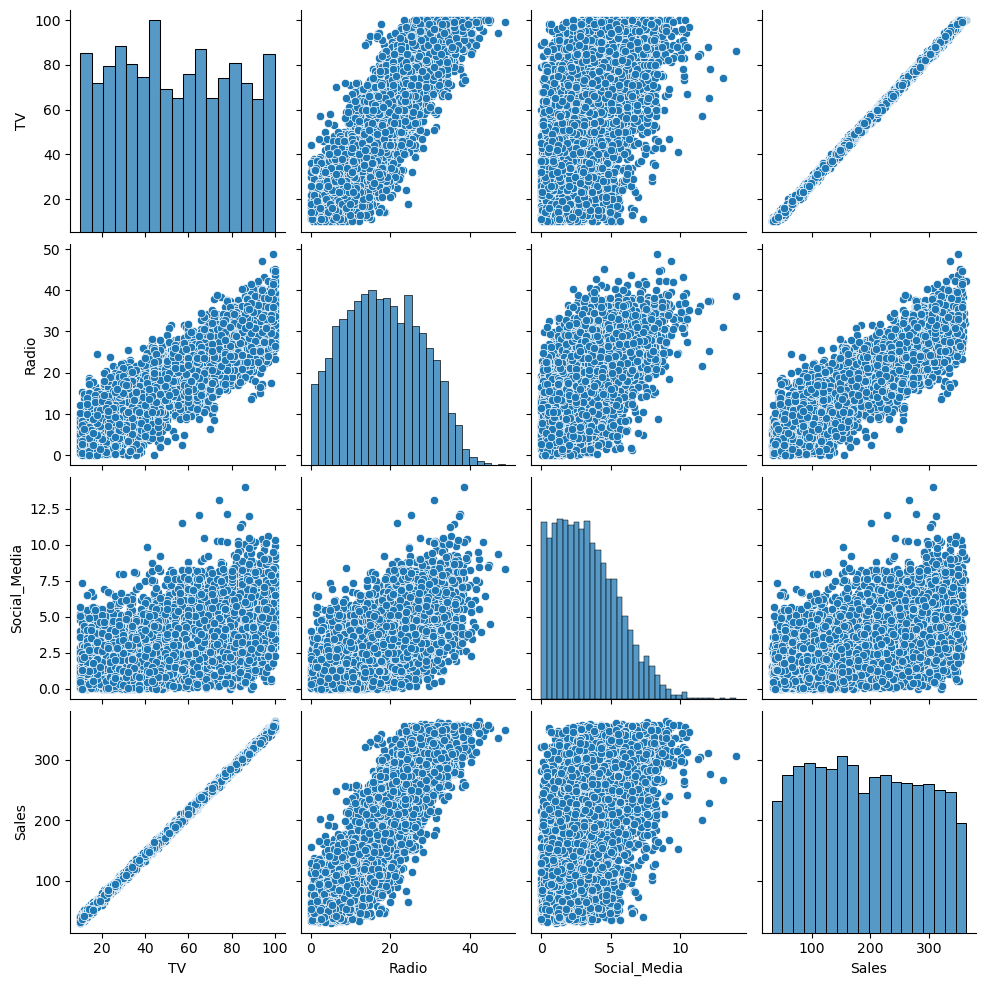

In [13]:
# EXPLORING THE MULTIPLE LINEAR REGRESSION USING PAIRPLOT MATRIX
sns.pairplot(clean_data)

C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


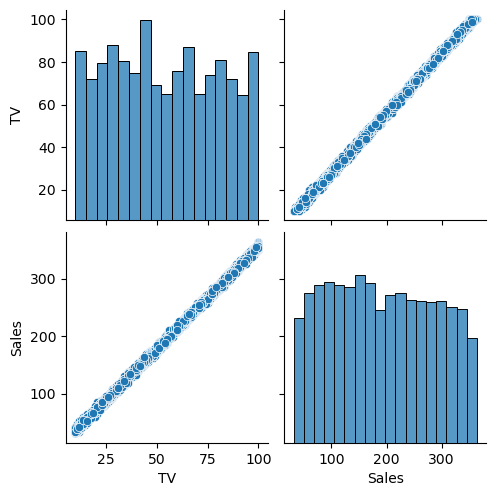

In [20]:
sns.pairplot(TV_Sales)

In [ ]:
# Radio and Social Media both appear to have linear relationships with Sales.
# Given this, TV, Radio and Social Media may be useful as independent variables in a multiple linear regression model estimating Sales.

In [27]:
# CALCULATING THE MEAN SALES IN TV, RADIO AND SOCIAL_MEDIA
mean_sales_tv = (clean_data.groupby('TV')['Sales'].mean())
mean_sales_tv


TV
10.0      35.916383
11.0      38.917204
12.0      42.747249
13.0      47.345199
14.0      49.952085
            ...    
96.0     342.639773
97.0     345.950124
98.0     348.644058
99.0     352.063501
100.0    355.354623
Name: Sales, Length: 91, dtype: float64

In [28]:
mean_sales_Radio = (clean_data.groupby('Radio')['Sales'].mean())
mean_sales_Radio


Radio
0.000684      58.098631
0.014486      45.032326
0.021883      53.702021
0.026295      62.970889
0.038151      34.059559
                ...    
44.560410    357.092487
44.861299    355.148081
45.082921    352.657695
47.116293    336.593420
48.871161    349.156031
Name: Sales, Length: 4546, dtype: float64

In [29]:
mean_sales_Social_Media = (clean_data.groupby('Social_Media')['Sales'].mean())
mean_sales_Social_Media


Social_Media
0.000031      67.666812
0.000977     155.233634
0.001315      86.453860
0.003177      86.115536
0.009093      80.962315
                ...    
11.964333    311.773774
12.054749    228.454384
12.108017    277.337551
13.083957    266.757198
13.981662    306.807598
Name: Sales, Length: 4546, dtype: float64

In [ ]:
# Model building: Fit a multiple linear regression model that predicts sales
# Using the independent variables of your choice, fit a multiple linear regression model that predicts Sales using two or more independent variables from data.

In [30]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV + Radio + Social_Media'



In [31]:
# Create an OLS model.
OLS = ols(formula = ols_formula, data = clean_data)

In [32]:
# Fit the model. 

model = OLS.fit()

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:49:42   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# INTERPRETATION OF THE ABOVE RESULTS
# TV was selected, as the preceding analysis showed a strong relationship between the TV promotional budget and the average Sales
# Also, Social_Media was selected because there is some level of relationship with sales
# Radio was not selected because it did not show a strong relationship to Sales in the preceding analysis.

In [ ]:
# Checking model assumptions
# For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: multicollinearity
# Let us Check and see if  all five multiple linear regression assumptions are upheld for the model.

In [ ]:
#1.Model assumption: Linearity
#2.Create scatterplots comparing the continuous independent variable(s) selected previously with Sales to check the linearity assumption.
#3.That's created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

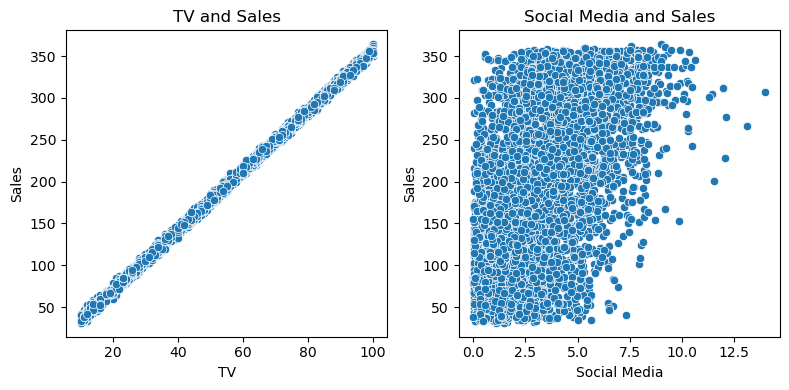

In [34]:
# Create a scatterplot for each independent variable and the dependent variable.

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between TV and Sales.
sns.scatterplot(x = clean_data['TV'], y = clean_data['Sales'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("TV and Sales")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = clean_data['Social_Media'], y = clean_data['Sales'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Social Media and Sales")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

In [ ]:
# The linearity assumption holds for Radio, as there is a clear linear relationship in the scatterplot between Radio and Sales.
# Social Media was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with Sales.

In [ ]:
#2.Model assumption: Independence
#a.The independent observation assumption states that each observation in the dataset is independent.
#b.As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

In [ ]:
#3.Model assumption: Normality
#a.reate the following plots to check the normality assumption:
#b.Plot 1: Histogram of the residuals
#c.Plot 2: Q-Q plot of the residuals

C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


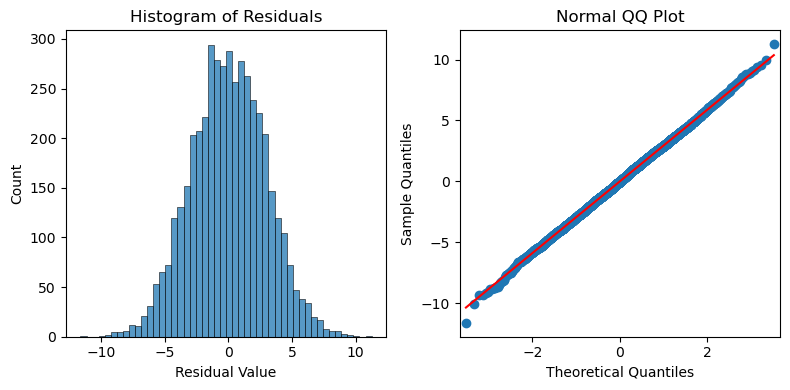

In [36]:
# Calculate the residuals.
import statsmodels.api as sm
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

In [ ]:
#. The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.
#.The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

In [ ]:
#4.Model assumption: Constant variance
#4a.Check that the constant variance assumption is not violated by creating a scatterplot with the fitted values and residuals.
#4b.Add a line at  𝑦=0 to visualize the variance of residuals above and below  𝑦=0.
 

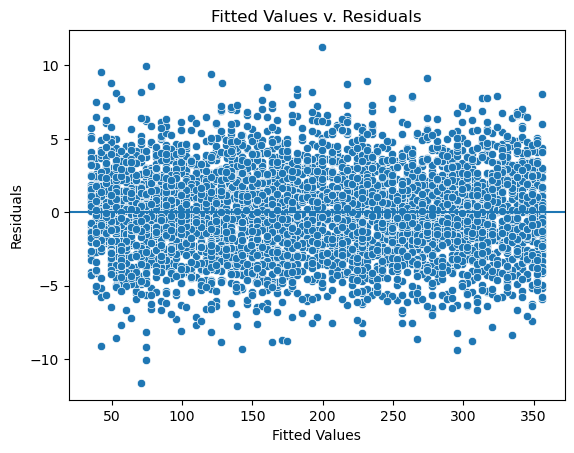

In [37]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot.
plt.show()

In [ ]:
#.The fitted values shows that TV is the biggest factor that decides the sales.
#.However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

In [ ]:
#5.Model assumption: No multicollinearity
#5a.The no multicollinearity assumption states that no two independent variables ( 𝑋𝑖  and  𝑋𝑗  ) can be highly correlated with each other.
#5b. Two common ways to check for multicollinearity are to:

#5c.Create scatterplots to show the relationship between pairs of independent variables
#5d.Use the variance inflation factor to detect multicollinearity
#5e.Use one of these two methods to check your model's no multicollinearity assumption. 

C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

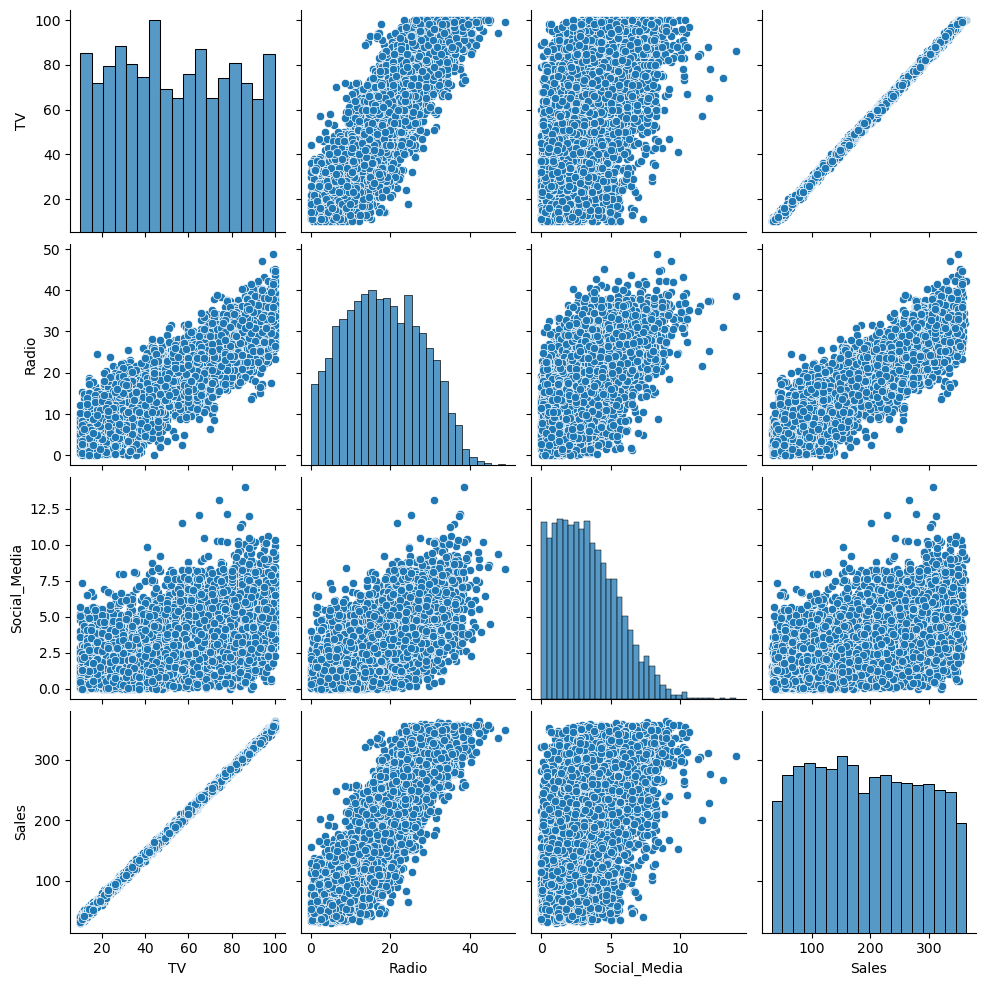

In [38]:
# Create a pairplot of the data.

sns.pairplot(clean_data)

In [40]:
# Calculate the variance inflation factor (optional).

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = clean_data[['TV','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
TV,4.326587
Social_Media,4.326587


In [ ]:
#.The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.
#.If a model used both TV and Social_Media as predictors, there would be a moderate linear relationship between TV and Social_Media 
#.that violates the multicollinearity assumption.
#.Furthermore, the variance inflation factor when both TV and Social_Media are included in the model is 4.33 for each variable, 
#.indicating high multicollinearity.

In [ ]:
#.Results and evaluation
#.Display the OLS regression results
#.Display the OLS regression results
#.If the model assumptions are met, you can interpret the model results accurately.
#.First, display the OLS regression results.

In [41]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:49:42   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Using TV and Social_Media as the independent variables results in a multiple linear regression model with $R^{2} = 0.999$.
# In other words, the model explains $99.9% of the variation in Sales. This makes the model an excellent predictor of Sales.


In [ ]:
# Interpret model coefficients
# With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.
# Again, display the OLS regression results.

In [42]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:49:42   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The model coefficients are:

#.beta_{0} = -0.1340	
#.beta_TV= 3.5626
#.beta_Radio = -0.0040
#.beta_Social_Media = 0.0050